# Visualization for proposal video

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Clean Vehicle Data

In [22]:
def build_loc_vehicle(state):
    state = state.lower()
    return 'data/vehicles/vehicles_' + state + '.csv'

In [23]:
loc = build_loc_vehicle('ca')

In [24]:
data_ca = pd.read_csv(loc)

/Users/samaygarg/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
data_ca.head()

,Vehicle ID,County GEOID,Registration Valid Date,DMV ID,DMV Snapshot,Registration Expiration Date,State Abbreviation,Geography,Vehicle Name
0,CA-002-03597\r,06099,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Chevrolet Volt
1,CA-002-03598\r,06105,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Nissan Leaf
2,CA-002-03599\r,06103,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Chevrolet Volt
3,CA-002-03600\r,06099,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Tesla Roadster
4,CA-002-03601\r,06099,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Tesla Roadster


In [26]:
data_small = data_ca[['County GEOID', 'Registration Valid Date', 'Vehicle Name']]
data_small.columns = ['geoid', 'registration', 'vehicle']
data_small.head()

,geoid,registration,vehicle
0,06099,2011-01-01,Chevrolet Volt
1,06105,2011-01-01,Nissan Leaf
2,06103,2011-01-01,Chevrolet Volt
3,06099,2011-01-01,Tesla Roadster
4,06099,2011-01-01,Tesla Roadster


In [27]:
def format_geoid(x):
    if type(x) == int:
        return '0' + str(x)
    return x

In [28]:
data_small['year'] = pd.to_datetime(data_small['registration']).dt.year
data_small.drop(columns='registration', inplace=True)

/Users/samaygarg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/samaygarg/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
data_small

,geoid,vehicle,year
0,06099,Chevrolet Volt,2011
1,06105,Nissan Leaf,2011
2,06103,Chevrolet Volt,2011
3,06099,Tesla Roadster,2011
4,06099,Tesla Roadster,2011
...,...,...,...
1913965,6047,Fiat 500e,2019
1913966,6047,Fiat 500e,2019
1913967,6047,Hyundai Ioniq EV,2019
1913968,6047,Hyundai Ioniq EV,2019


In [30]:
data_small['geoid'] = data_small['geoid'].apply(lambda x: format_geoid(x))

/Users/samaygarg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
grouped = data_small.groupby(['year', 'geoid']).count()
grouped.head(25)

vehicle
year geoid         
2010 06001       20
     06005        1
     06013       10
     06019        2
     06023        2
     06029        1
     06033        1
     06037      360
     06041       15
     06053        1
     06055        4
     06059       38
     06061        5
     06065        4
     06067        6
     06069        1
     06071        4
     06073       29
     06075       24
     06077        1
     06079        1
     06081       50
     06083       11
     06085       93
     06087        6

In [32]:
grouped.shape

(541, 1)

In [33]:
vehicles_clean = grouped.copy()

##  Clean Education Data

In [34]:
def build_loc_ed(year):
    year = str(year)
    dataloc =  'data/education/education_' + year + '.csv'
    metaloc =  'data/education/education_' + year + '_meta.csv'
    return dataloc, metaloc

In [37]:
loc, metaloc = build_loc_ed(2017)
data_2017 = pd.read_csv(loc)
metadata = pd.read_csv(metaloc)

In [38]:
data_2017.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C02_001E,S1501_C02_001M,S1501_C03_001E,S1501_C03_001M,S1501_C04_001E,S1501_C04_001M,...,S1501_C02_064E,S1501_C02_064M,S1501_C03_064E,S1501_C03_064M,S1501_C04_064E,S1501_C04_064M,S1501_C05_064E,S1501_C05_064M,S1501_C06_064E,S1501_C06_064M
0,id,Geographic Area Name,Estimate!!Total!!Population 18 to 24 years,Margin of Error!!Total MOE!!Population 18 to 2...,Estimate!!Percent!!Population 18 to 24 years,Margin of Error!!Percent MOE!!Population 18 to...,Estimate!!Male!!Population 18 to 24 years,Margin of Error!!Male MOE!!Population 18 to 24...,Estimate!!Percent Male!!Population 18 to 24 years,Margin of Error!!Percent Male MOE!!Population ...,...,Estimate!!Percent!!MEDIAN EARNINGS IN THE PAST...,Margin of Error!!Percent MOE!!MEDIAN EARNINGS ...,Estimate!!Male!!MEDIAN EARNINGS IN THE PAST 12...,Margin of Error!!Male MOE!!MEDIAN EARNINGS IN ...,Estimate!!Percent Male!!MEDIAN EARNINGS IN THE...,Margin of Error!!Percent Male MOE!!MEDIAN EARN...,Estimate!!Female!!MEDIAN EARNINGS IN THE PAST ...,Margin of Error!!Female MOE!!MEDIAN EARNINGS I...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female MOE!!MEDIAN EA...
1,0500000US01005,"Barbour County, Alabama",2253,72,(X),(X),1284,43,(X),(X),...,(X),(X),60281,44190,(X),(X),52545,2745,(X),(X)
2,0500000US01007,"Bibb County, Alabama",1993,174,(X),(X),1084,145,(X),(X),...,(X),(X),62778,12701,(X),(X),51336,5465,(X),(X)
3,0500000US01011,"Bullock County, Alabama",935,176,(X),(X),510,162,(X),(X),...,(X),(X),-,**,(X),(X),28750,24310,(X),(X)
4,0500000US01015,"Calhoun County, Alabama",11122,130,(X),(X),5590,108,(X),(X),...,(X),(X),61625,16854,(X),(X),50473,2119,(X),(X)


In [51]:
metadata

,GEO_ID,id
0,NAME,Geographic Area Name
1,S1501_C01_001E,Estimate!!Total!!Population 18 to 24 years
2,S1501_C01_001M,Margin of Error!!Total MOE!!Population 18 to 2...
3,S1501_C01_002E,Estimate!!Total!!Population 18 to 24 years!!Le...
4,S1501_C01_002M,Margin of Error!!Total MOE!!Population 18 to 2...
...,...,...
764,S1501_C06_062M,Margin of Error!!Percent Female MOE!!MEDIAN EA...
765,S1501_C06_063E,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...
766,S1501_C06_063M,Margin of Error!!Percent Female MOE!!MEDIAN EA...
767,S1501_C06_064E,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...


In [67]:
tokeep = ['GEO_ID', 'NAME']
tokeep.extend(list(metadata.iloc[[29,31],0].values))

In [68]:
tokeep

['GEO_ID', 'NAME', 'S1501_C01_015E', 'S1501_C01_016E']

In [70]:
data_small = data_2017.loc[:, tokeep]

In [71]:
data_small.head()

,GEO_ID,NAME,S1501_C01_015E,S1501_C01_016E
0,id,Geographic Area Name,Estimate!!Total!!Population 25 years and over!...,Estimate!!Total!!Population 25 years and over!...
1,0500000US01005,"Barbour County, Alabama",(X),3761
2,0500000US01007,"Bibb County, Alabama",(X),3252
3,0500000US01011,"Bullock County, Alabama",(X),1177
4,0500000US01015,"Calhoun County, Alabama",(X),14938


In [73]:
data_small.columns = data_small.iloc[0]
data_small.drop(0, inplace=True)
data_small.head()

,id,Geographic Area Name,Estimate!!Total!!Population 25 years and over!!Percent bachelor's degree or higher,Estimate!!Total!!Population 25 years and over!!Population 25 to 34 years
1,0500000US01005,"Barbour County, Alabama",(X),3761
2,0500000US01007,"Bibb County, Alabama",(X),3252
3,0500000US01011,"Bullock County, Alabama",(X),1177
4,0500000US01015,"Calhoun County, Alabama",(X),14938
5,0500000US01017,"Chambers County, Alabama",(X),3937


In [74]:
def id_filter(x):
    return x[-5:]

In [75]:
data_small['id'] = data_small['id'].apply(id_filter)

In [104]:
data_small

,id,Geographic Area Name,Estimate!!Total!!Population 25 years and over!!Percent bachelor's degree or higher,Estimate!!Total!!Population 25 years and over!!Population 25 to 34 years
1,01005,"Barbour County, Alabama",(X),3761
2,01007,"Bibb County, Alabama",(X),3252
3,01011,"Bullock County, Alabama",(X),1177
4,01015,"Calhoun County, Alabama",(X),14938
5,01017,"Chambers County, Alabama",(X),3937
...,...,...,...,...
3216,72027,"Camuy Municipio, Puerto Rico",(X),3910
3217,72113,"Ponce Municipio, Puerto Rico",(X),18897
3218,72033,"Cataño Municipio, Puerto Rico",(X),3444
3219,72054,"Florida Municipio, Puerto Rico",(X),1359


In [105]:
ed_clean = data_small.copy()

## Merge Data Frames and create plot

In [106]:
ed_clean.head()
ed_clean = ed_clean.set_index('id')
ed_clean.head()

,Geographic Area Name,Estimate!!Total!!Population 25 years and over!!Percent bachelor's degree or higher,Estimate!!Total!!Population 25 years and over!!Population 25 to 34 years
id,,,
01005,"Barbour County, Alabama",(X),3761
01007,"Bibb County, Alabama",(X),3252
01011,"Bullock County, Alabama",(X),1177
01015,"Calhoun County, Alabama",(X),14938
01017,"Chambers County, Alabama",(X),3937


In [107]:
vehicles_clean.head()

vehicle
year geoid         
2010 06001       20
     06005        1
     06013       10
     06019        2
     06023        2

In [108]:
vehicles = vehicles_clean.loc[2017]
vehicles.drop('Unknown', inplace=True)

In [109]:
vehicles.head()

,vehicle
geoid,
06001,24758
06003,3
06005,92
06007,395
06009,115


In [113]:
merged = vehicles.join(ed_clean, how='inner')

In [115]:
merged.head()

,vehicle,Geographic Area Name,Estimate!!Total!!Population 25 years and over!!Percent bachelor's degree or higher,Estimate!!Total!!Population 25 years and over!!Population 25 to 34 years
06001,24758,"Alameda County, California",(X),265447
06003,3,"Alpine County, California",(X),97
06005,92,"Amador County, California",(X),3436
06007,395,"Butte County, California",(X),28018
06009,115,"Calaveras County, California",(X),3985


In [116]:
vehicles = merged['vehicle'].values

In [119]:
pops = merged.iloc[:,3].values

In [122]:
pops = np.array([int(x) for x in pops])

In [123]:
pops

array([ 265447,      97,    3436,   28018,    3985,    2864,  141793,
          3997,   18324,  146165,    3417,   18372,   25615,    2053,
        133605,   24902,    7037,    6158, 1593895,   21251,   23196,
          1845,   10089,   38168,    1046,    2112,   63819,   17339,
          9726,  448620,   41461,    1652,  322160,  229832,    7702,
        312850,  534743,  198732,   99215,   32427,  110173,   58826,
        298467,   33358,   22051,     187,    4405,   62398,   65442,
         76084,   13012,    7321,    1069,   64593,    6376,  111318,
         28893,   11734])

In [124]:
pops = pops / pops.sum()

Text(0, 0.5, 'Number of Registered EVs')

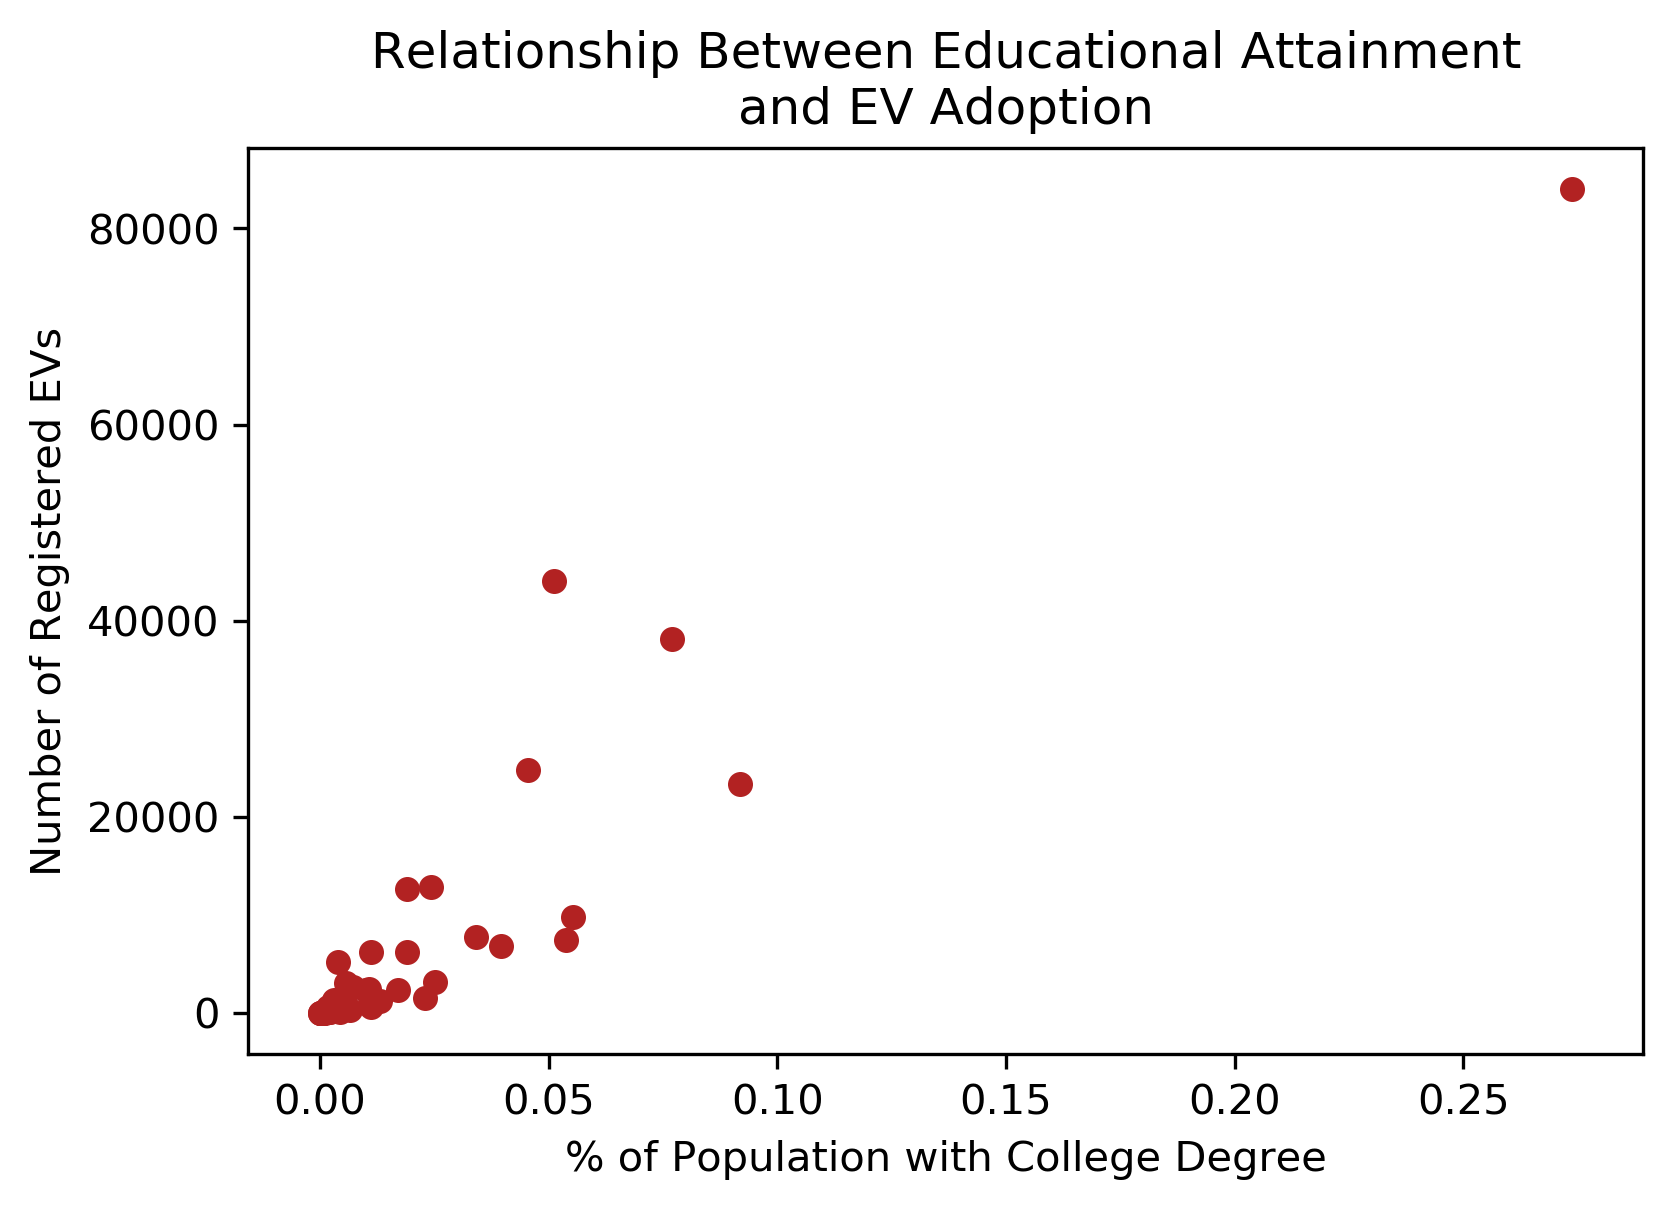

In [131]:
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
ax.scatter(pops, vehicles, color='firebrick', s=25)

ax.set_title('Relationship Between Educational Attainment\nand EV Adoption', fontsize=16)
ax.set_xlabel('% of Population with College Degree', fontsize=14)
ax.set_ylabel('Number of Registered EVs', fontsize=14)
ax.tick_params(axis='both', direction='in', ax-=)